# Alllife Credit Card Segmentation Project

In [1]:
import warnings
warnings.filterwarnings('ignore')

#let us start by importing the relevant libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering

### 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data.

In [2]:
df = pd.read_excel('Credit Card Customer Data.xlsx', sheet_name='Sheet1' )
print("Column headings:")
print(df.columns)

Column headings:
Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


All values are int data type

Check for unique values

In [6]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

Checking to ensure no duplicated rows

In [7]:
df[df.duplicated(['Customer Key'], keep=False)]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


From the information above, although there are duplication in the customer key, no row is repeated, so its a separate data

Columns Sl_No and Custimer Key are not going to help in analysis so we can drop them

In [8]:
df.drop('Sl_No', axis=1, inplace=True)

In [9]:
df.drop('Customer Key', axis=1, inplace=True)

In [10]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


Credit Limit - 75% of customers fall within the 48,000 credit limit and there is an outlier of 200,000. Credit Limit needs to be normalized to bring it in line with the the other data points.

Total Credit Card - 75% of customers have 1-6 credit cards and outlier is 10

Checking for negative values

In [13]:
for i in list(df.columns):
    print ("There are ", len(df[df[i] < 0]), "negative values in", i)

There are  0 negative values in Avg_Credit_Limit
There are  0 negative values in Total_Credit_Cards
There are  0 negative values in Total_visits_bank
There are  0 negative values in Total_visits_online
There are  0 negative values in Total_calls_made


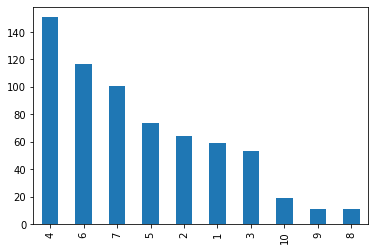

In [14]:
pd.value_counts(df["Total_Credit_Cards"]).plot(kind="bar")

#### Distribution based on number of credit cards per customer

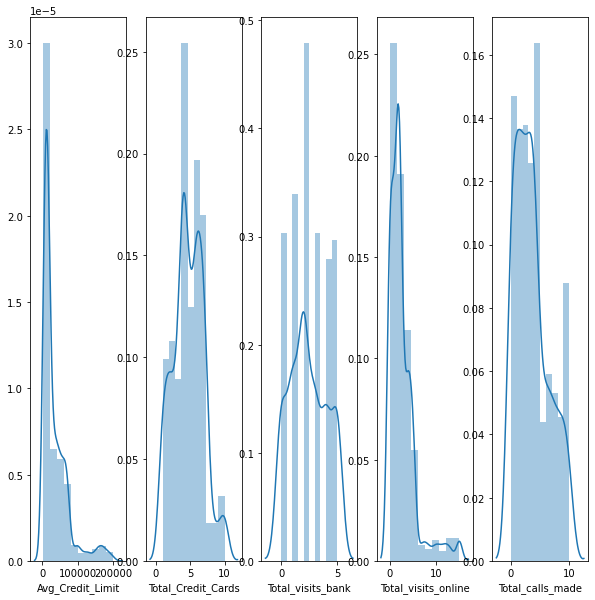

In [15]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 5, figsize=(10,10))
vis1 = sns.distplot(df["Avg_Credit_Limit"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["Total_Credit_Cards"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["Total_visits_bank"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["Total_visits_online"],bins=10, ax=ax[3])
vis4 = sns.distplot(df["Total_calls_made"],bins=10, ax=ax[4])
f.savefig('subplot.png')

Box plot for Avg_Credit_Limit


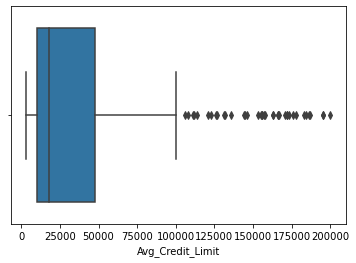

Box plot for Total_Credit_Cards


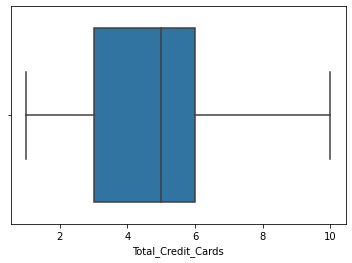

Box plot for Total_visits_bank


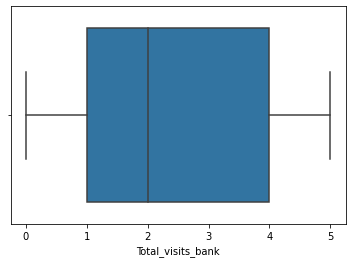

Box plot for Total_visits_online


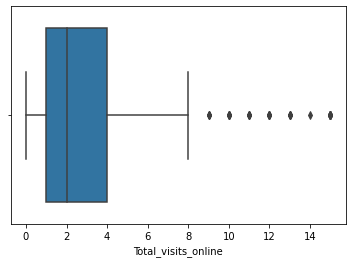

Box plot for Total_calls_made


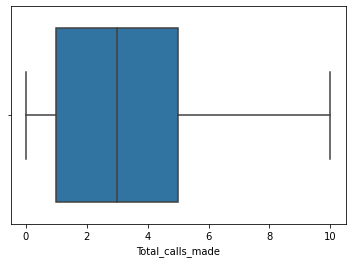

In [16]:
for feature in list(df.columns):
    print ("Box plot for " + feature)
    sns.boxplot(x=df[feature])
    plt.show()

From the box plot analysis above, we can confirm that: 
    
* Avg_Credit_Limit feature has outliers
* Total_visits_online feature has outliers

Analysis of the body of distribution

Box plot for Avg_Credit_Limit


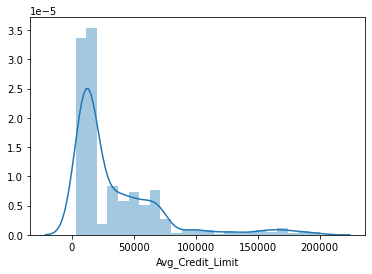

Box plot for Total_Credit_Cards


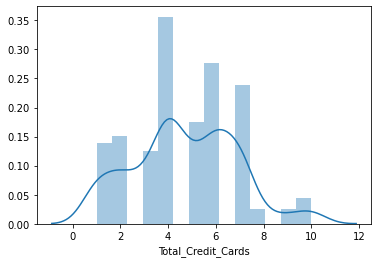

Box plot for Total_visits_bank


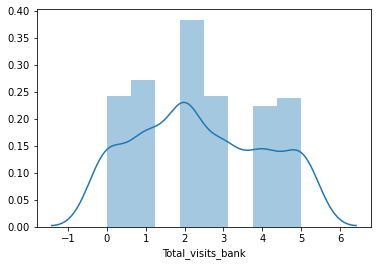

Box plot for Total_visits_online


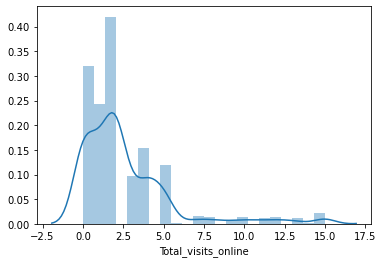

Box plot for Total_calls_made


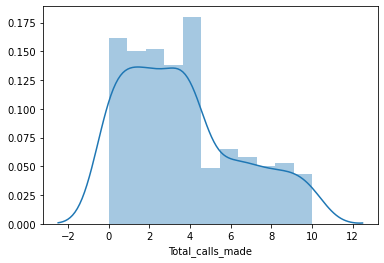

In [17]:
for feature in list(df.columns):
    print ("Box plot for " + feature)
    sns.distplot(df[feature], kde=True)
    plt.show()

The distribution above also shows that and have outliers

##### Detecting outliers using Skewness

In [18]:
for column in list(df):
    print (column, ":", df[column].skew())

Avg_Credit_Limit : 2.202395623436587
Total_Credit_Cards : 0.14487899029570606
Total_visits_bank : 0.14189601482438785
Total_visits_online : 2.2256067138726565
Total_calls_made : 0.6589053024181467


he skewness value should be btw -1 and 1 if the data is normally distributed

From the analysis above, we can confirm that:

* Avg_Credit_Limit feature has outliers because it is skewed
* Total_visits_online feature has outliers because it is skewed

#### Treatment of outliers

We can handle outliers using

a) Log Transformation

b) Replacing Outliers with Central Values such as Median

c) Drop the outliers if there is no significant data loss

I will go with the log transformation strategy

In [19]:
df['Avg_Credit_Limit'] = np.log(df['Avg_Credit_Limit'])
df['Total_visits_online'] = np.log(df['Total_visits_online'])

In [20]:
df[df < 0] = 0

In [21]:
for column in list(df):
    print (column, ":", df[column].skew())

Avg_Credit_Limit : 0.39375329930733727
Total_Credit_Cards : 0.14487899029570606
Total_visits_bank : 0.14189601482438785
Total_visits_online : 0.7667186774245981
Total_calls_made : 0.6589053024181467


Box plot for Avg_Credit_Limit


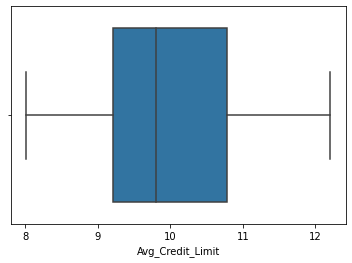

Box plot for Total_visits_online


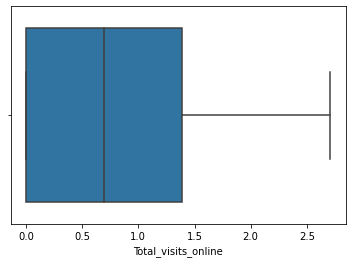

In [22]:
for feature in ['Avg_Credit_Limit','Total_visits_online']:
    print ("Box plot for " + feature)
    sns.boxplot(x=df[feature])
    plt.show()

### 2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs

### Bi-variate analysis

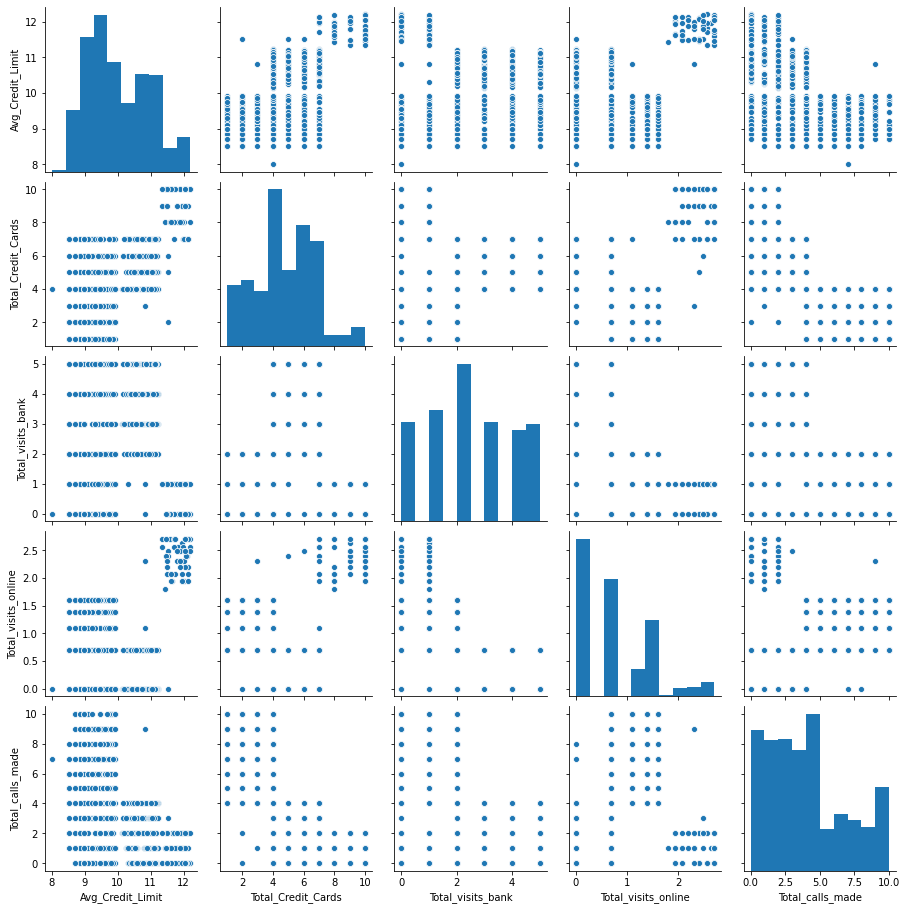

In [23]:
sns.pairplot(df)

In [24]:
corr = df.corr()
corr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.586243,0.073937,0.104745,-0.466308
Total_Credit_Cards,0.586243,1.000000,0.315796,-0.061622,-0.651251
Total_visits_bank,0.073937,0.315796,1.000000,-0.632113,-0.506016
Total_visits_online,0.104745,-0.061622,-0.632113,1.000000,0.335119
Total_calls_made,-0.466308,-0.651251,-0.506016,0.335119,1.000000


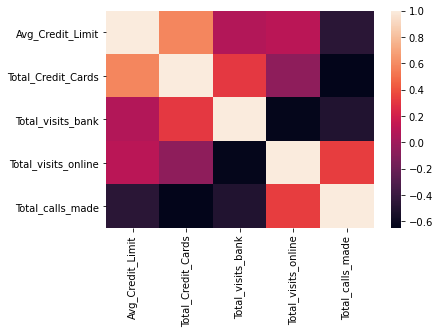

In [25]:
sns.heatmap(corr)

The heatmap shows us that :


* there is a strong positive correlation of 0.59 between Avg_Credit_Limit and Total_Credit_Cards

* there is a strong negative correlation of -0.651 between Total_calls_made and Total_Credit_Cards

* there is a strong negative correlation of -0.632 between Total_visits_online and Total_visits_bank

 #### Based on the pair plot, there appears to be 2-3 clusters

### 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot

In [26]:
##Scale the data 

df_z = df.apply(zscore)
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-1.001984,-1.251537
1,0.885387,-0.787585,-1.473731,2.158203,1.891859
2,0.885387,1.058973,-0.860451,0.505809,0.145528
3,0.336281,0.135694,-0.860451,-1.001984,0.145528
4,1.630478,0.597334,-1.473731,2.408431,-0.203739


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

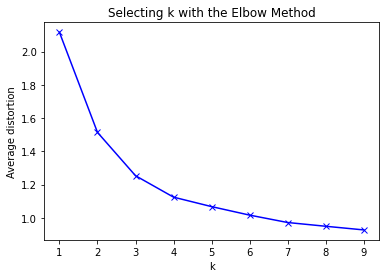

In [27]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Based on the elbow method K value of 3 seems to be the point as per above graph

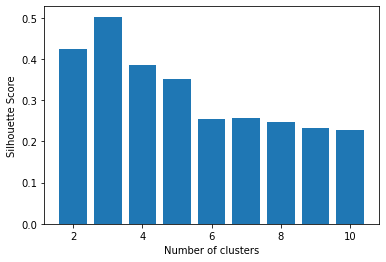

In [28]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_z, KMeans(n_clusters = n_cluster).fit_predict(df_z))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

#### Silhouette score at cluster K=3 is the highest

In [29]:
final_model=KMeans(3)
final_model.fit(df_z)
prediction=final_model.predict(df_z)

#Append the prediction 
df["K_Means_Cluster"] = prediction
df_z["K_Means_Cluster"] = prediction
print("K_Means_Cluster Assigned : \n")
df.head()

K_Means_Cluster Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_Means_Cluster
0,11.512925,2,1,0.000000,0,2
1,10.819778,3,0,2.302585,9,1
2,10.819778,7,1,1.098612,4,2
3,10.308953,5,1,0.000000,4,2
4,11.512925,6,0,2.484907,3,0


In [30]:
dfClust = df.groupby(['K_Means_Cluster'])
dfClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_Means_Cluster,,,,,
0,11.825513,8.740000,0.600000,2.352697,1.080000
1,9.314747,2.419643,0.941964,1.206384,6.883929
2,10.154552,5.510363,3.484456,0.243472,1.992228


#### There are 3 distinct clusters of data points. ### Cluster 2 with average creit of 2-3 credit cards and average credit of 2.4 shows a pattern of making calls to customer services. Cluster 1 with 5-6 credit cards and 10 average credit limit have a disposition of visiting bank for customer service and Cluster 0 with highest number of credit cards and average credit limit 11.8 interact with customer service using online method.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161771A82B0>,
      dtype=object)

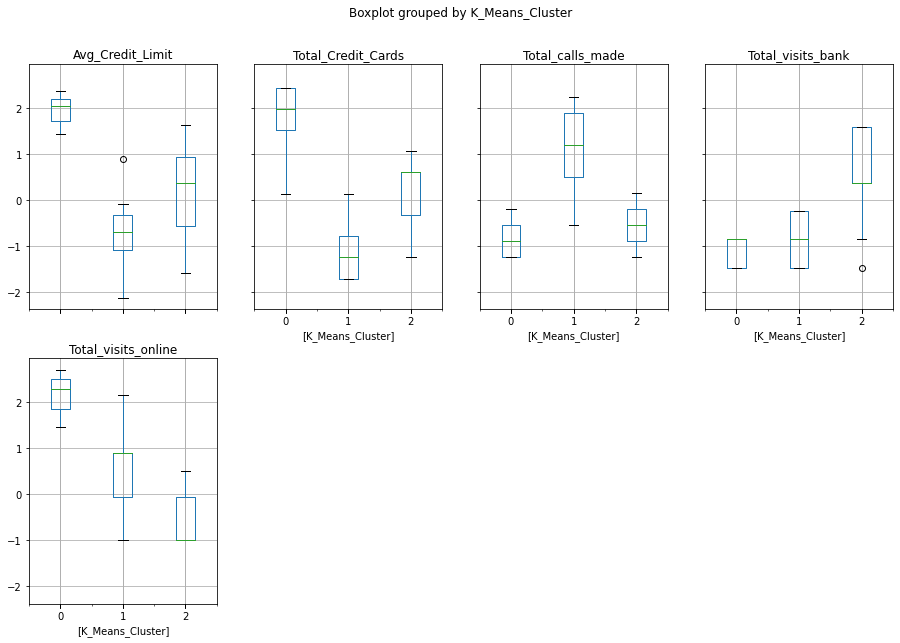

In [31]:
df_z.boxplot(by='K_Means_Cluster', layout = (2,4),figsize=(15,10))

In [32]:
df_hc=df_z.drop('K_Means_Cluster',1)
df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-1.001984,-1.251537
1,0.885387,-0.787585,-1.473731,2.158203,1.891859
2,0.885387,1.058973,-0.860451,0.505809,0.145528
3,0.336281,0.135694,-0.860451,-1.001984,0.145528
4,1.630478,0.597334,-1.473731,2.408431,-0.203739


### 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot

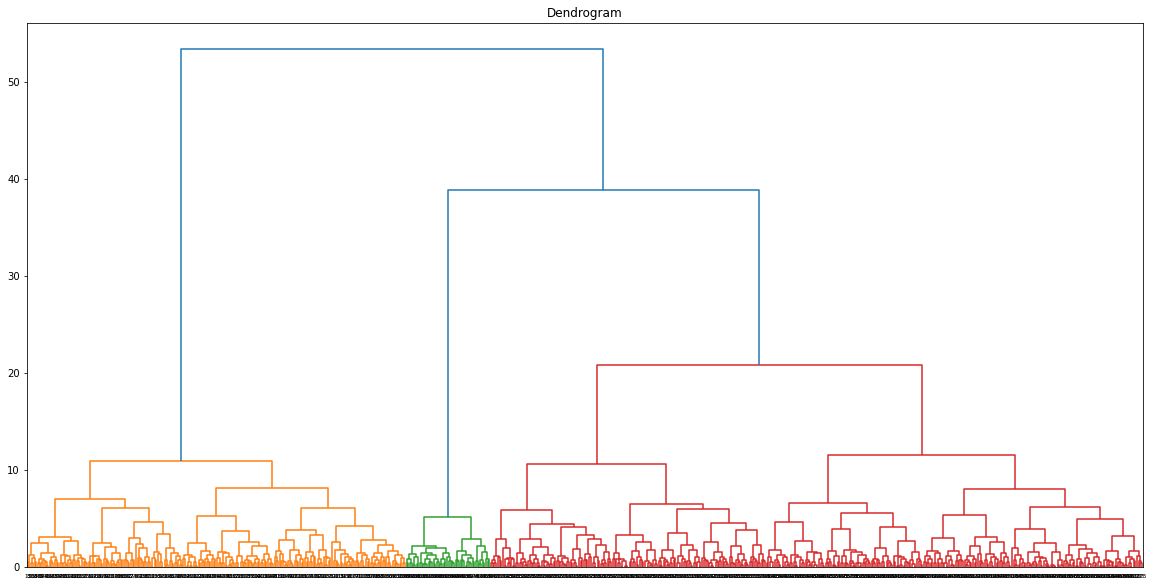

In [33]:
plt.figure(figsize=(20,10))

merg = linkage(df_hc, method='ward')
dendrogram(merg, leaf_rotation = 360)
plt.title('Dendrogram')
plt.show()

#### Analysis of the HC indicates that by taking a cut at 20, we will get 3 clusters. 

In [34]:
#Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(df_hc, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_hc))

c

0.8658695501958379

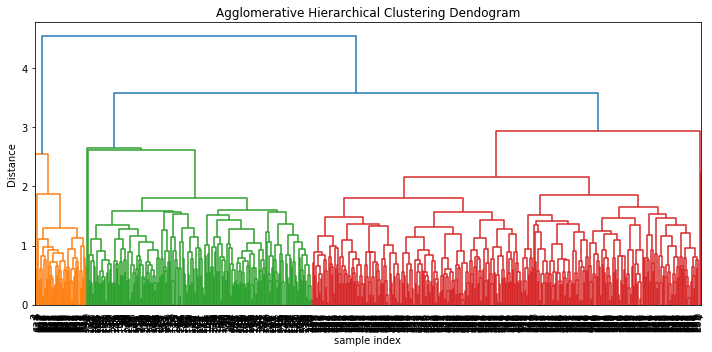

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,leaf_font_size=10. )
plt.tight_layout()

In [36]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_hc, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_hc))

c

0.8356322694421626

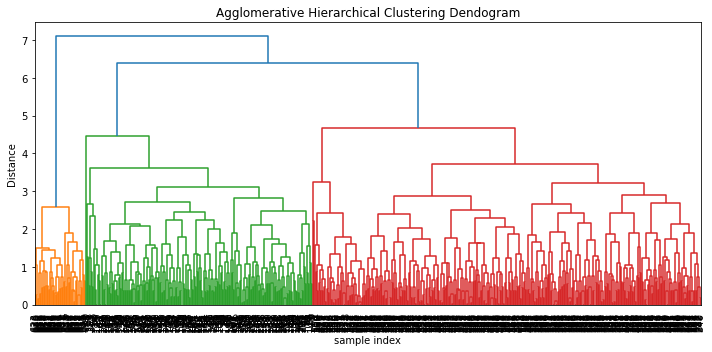

In [37]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,leaf_font_size=10. )
plt.tight_layout()

In [38]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_hc, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_hc))

c

0.780002231073503

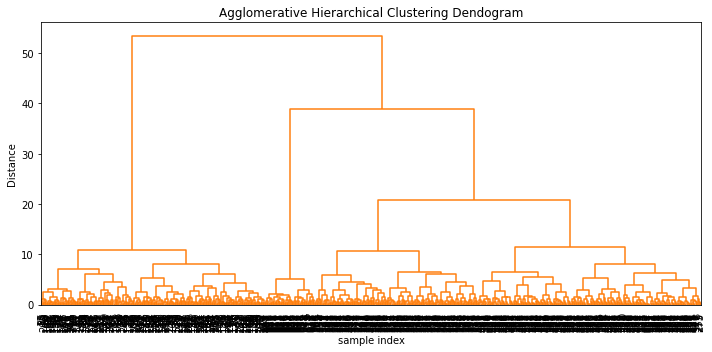

In [39]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

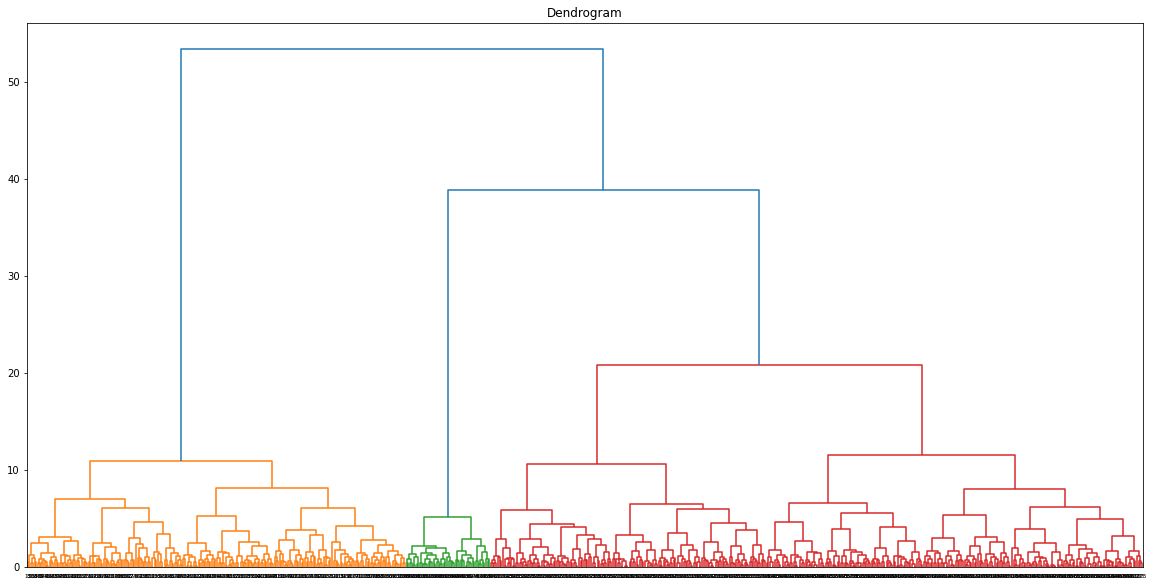

In [40]:
plt.figure(figsize=(20,10))

merg = linkage(df_hc, method='ward')
dendrogram(merg, leaf_rotation = 360)
plt.title('Dendrogram')
plt.show()

In [41]:
HC_cluster_labels = cut_tree(merg, n_clusters=3).reshape(-1, )
HC_cluster_labels

array([0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
df_hc["Hierarchical_Cluster_labels"] = HC_cluster_labels
df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Hierarchical_Cluster_labels
0,1.630478,-1.249225,-0.860451,-1.001984,-1.251537,0
1,0.885387,-0.787585,-1.473731,2.158203,1.891859,1
2,0.885387,1.058973,-0.860451,0.505809,0.145528,0
3,0.336281,0.135694,-0.860451,-1.001984,0.145528,0
4,1.630478,0.597334,-1.473731,2.408431,-0.203739,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001617582ADC0>,
      dtype=object)

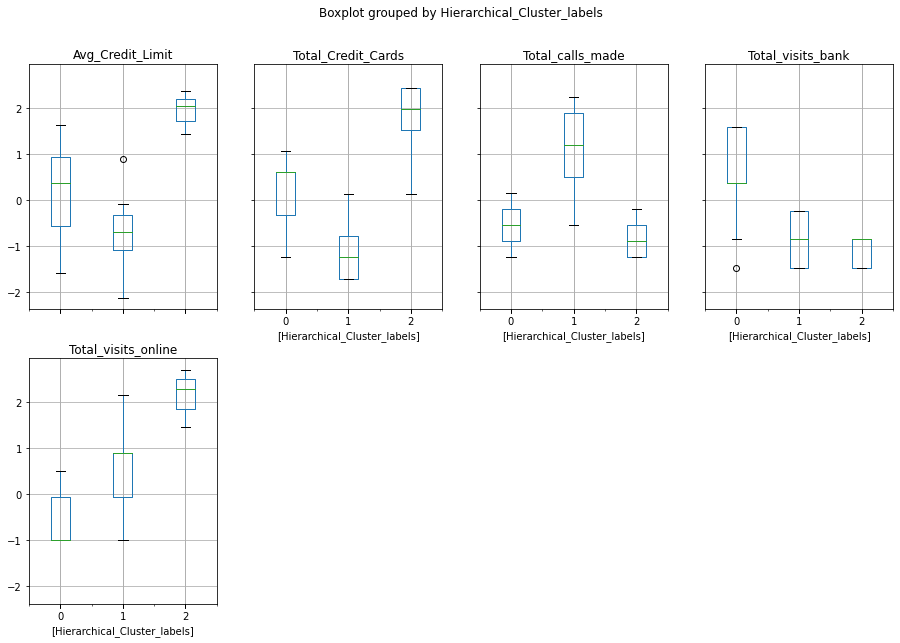

In [43]:
df_hc.boxplot(by='Hierarchical_Cluster_labels', layout = (2,4),figsize=(15,10))

### 5. Calculate average silhouette score for both methods

In [44]:
from sklearn import metrics
kmeans_values=[]
for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_z)
    sil_score = metrics.silhouette_score(df_z,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_z, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.433
Silhouette score for 3 cluster k-means: 0.528
Silhouette score for 4 cluster k-means: 0.396
Silhouette score for 5 cluster k-means: 0.362
Silhouette score for 6 cluster k-means: 0.258
Silhouette score for 7 cluster k-means: 0.260
Silhouette score for 8 cluster k-means: 0.253
Silhouette score for 9 cluster k-means: 0.235
Silhouette score for 10 cluster k-means: 0.233
Silhouette score for 11 cluster k-means: 0.232
Silhouette score for 12 cluster k-means: 0.221
Silhouette score for 13 cluster k-means: 0.231
Silhouette score for 14 cluster k-means: 0.237
Silhouette score for 15 cluster k-means: 0.207
Silhouette score for 16 cluster k-means: 0.228
Silhouette score for 17 cluster k-means: 0.240
Silhouette score for 18 cluster k-means: 0.237
Silhouette score for 19 cluster k-means: 0.208


In [45]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_hc)
        sil_score = metrics.silhouette_score(df_hc, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [46]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
2,2,0.467394,complete,2
1,2,0.467394,average,2
0,2,0.432552,ward,2
4,4,0.430195,average,4
3,4,0.386872,ward,4
7,6,0.340767,average,6
5,4,0.291925,complete,4
8,6,0.269171,complete,6
10,8,0.242317,average,8
13,10,0.225090,average,10


### 6. Compare K-means clusters with Hierarchical clusters.

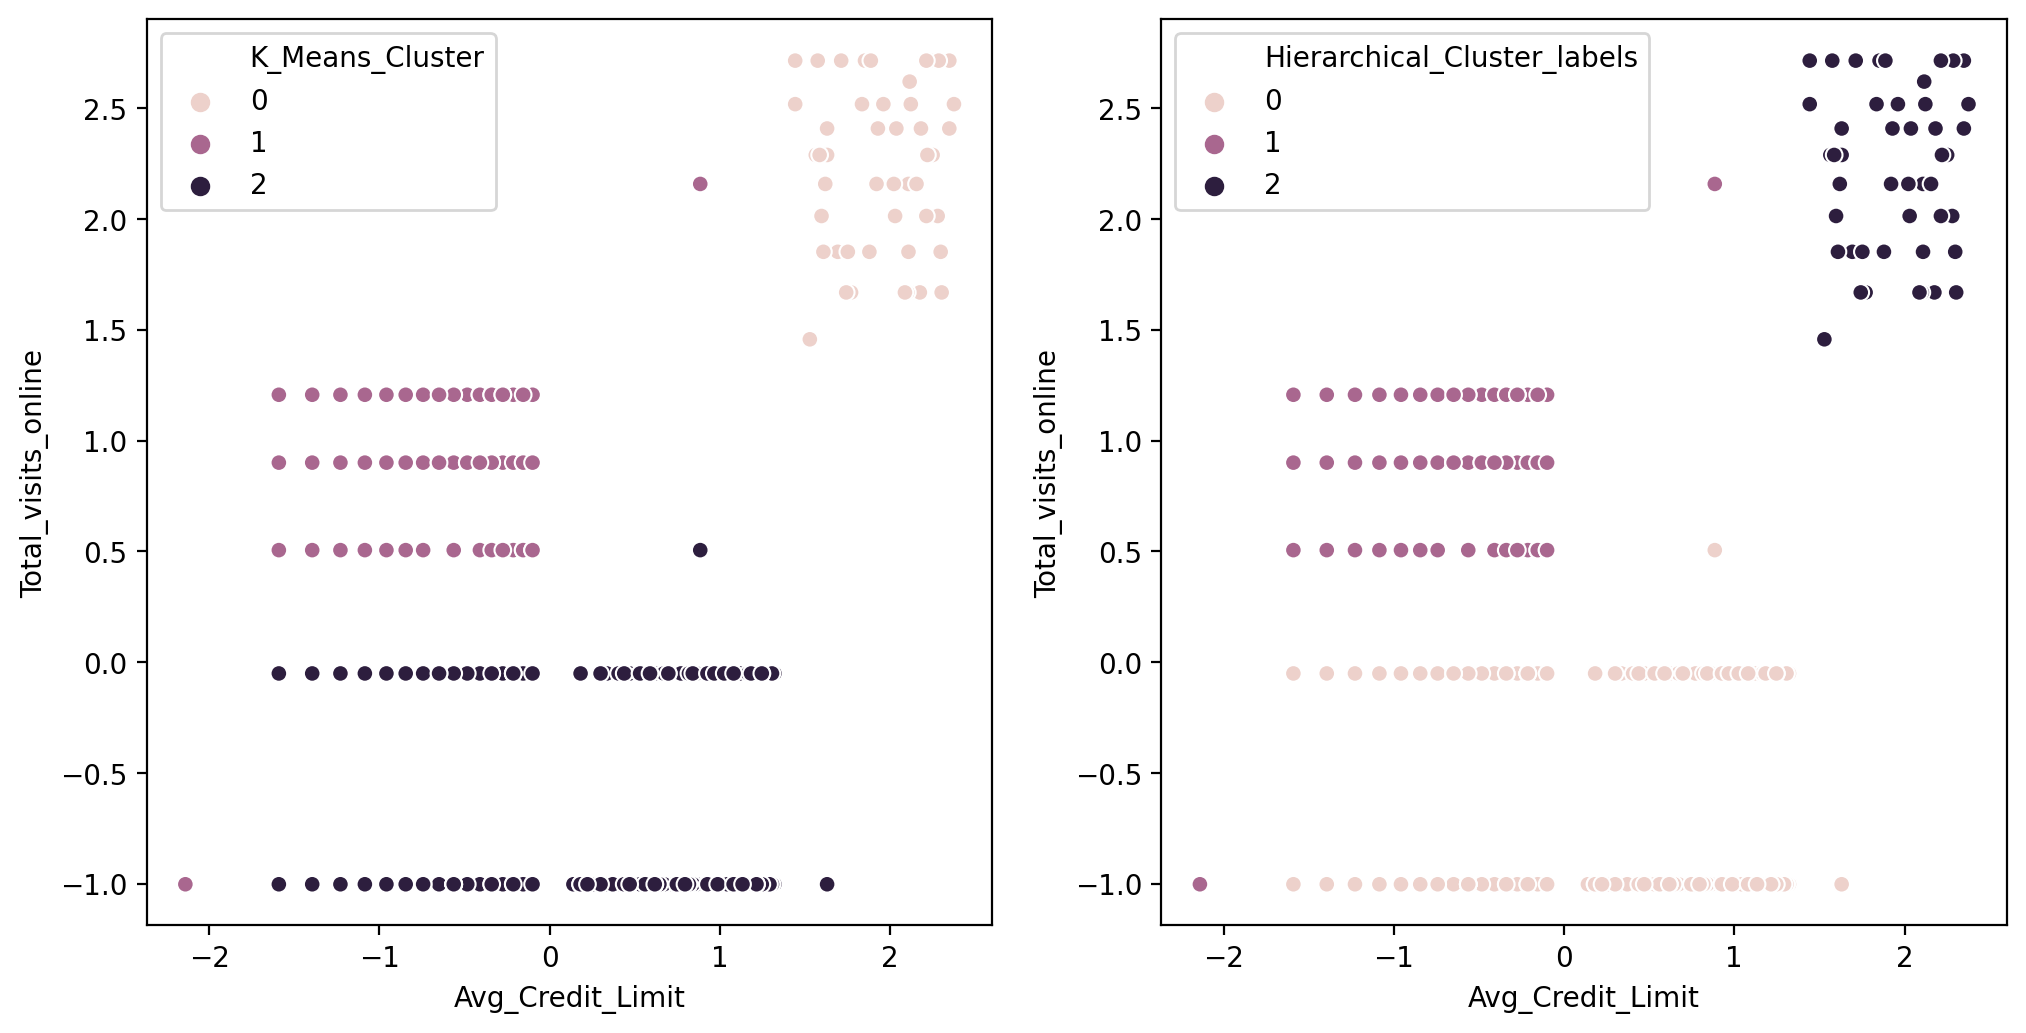

In [47]:
# scatter plot using the first two principal components to observe the cluster distribution
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_visits_online',data=df_z,hue='K_Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_online',data=df_hc,hue='Hierarchical_Cluster_labels')


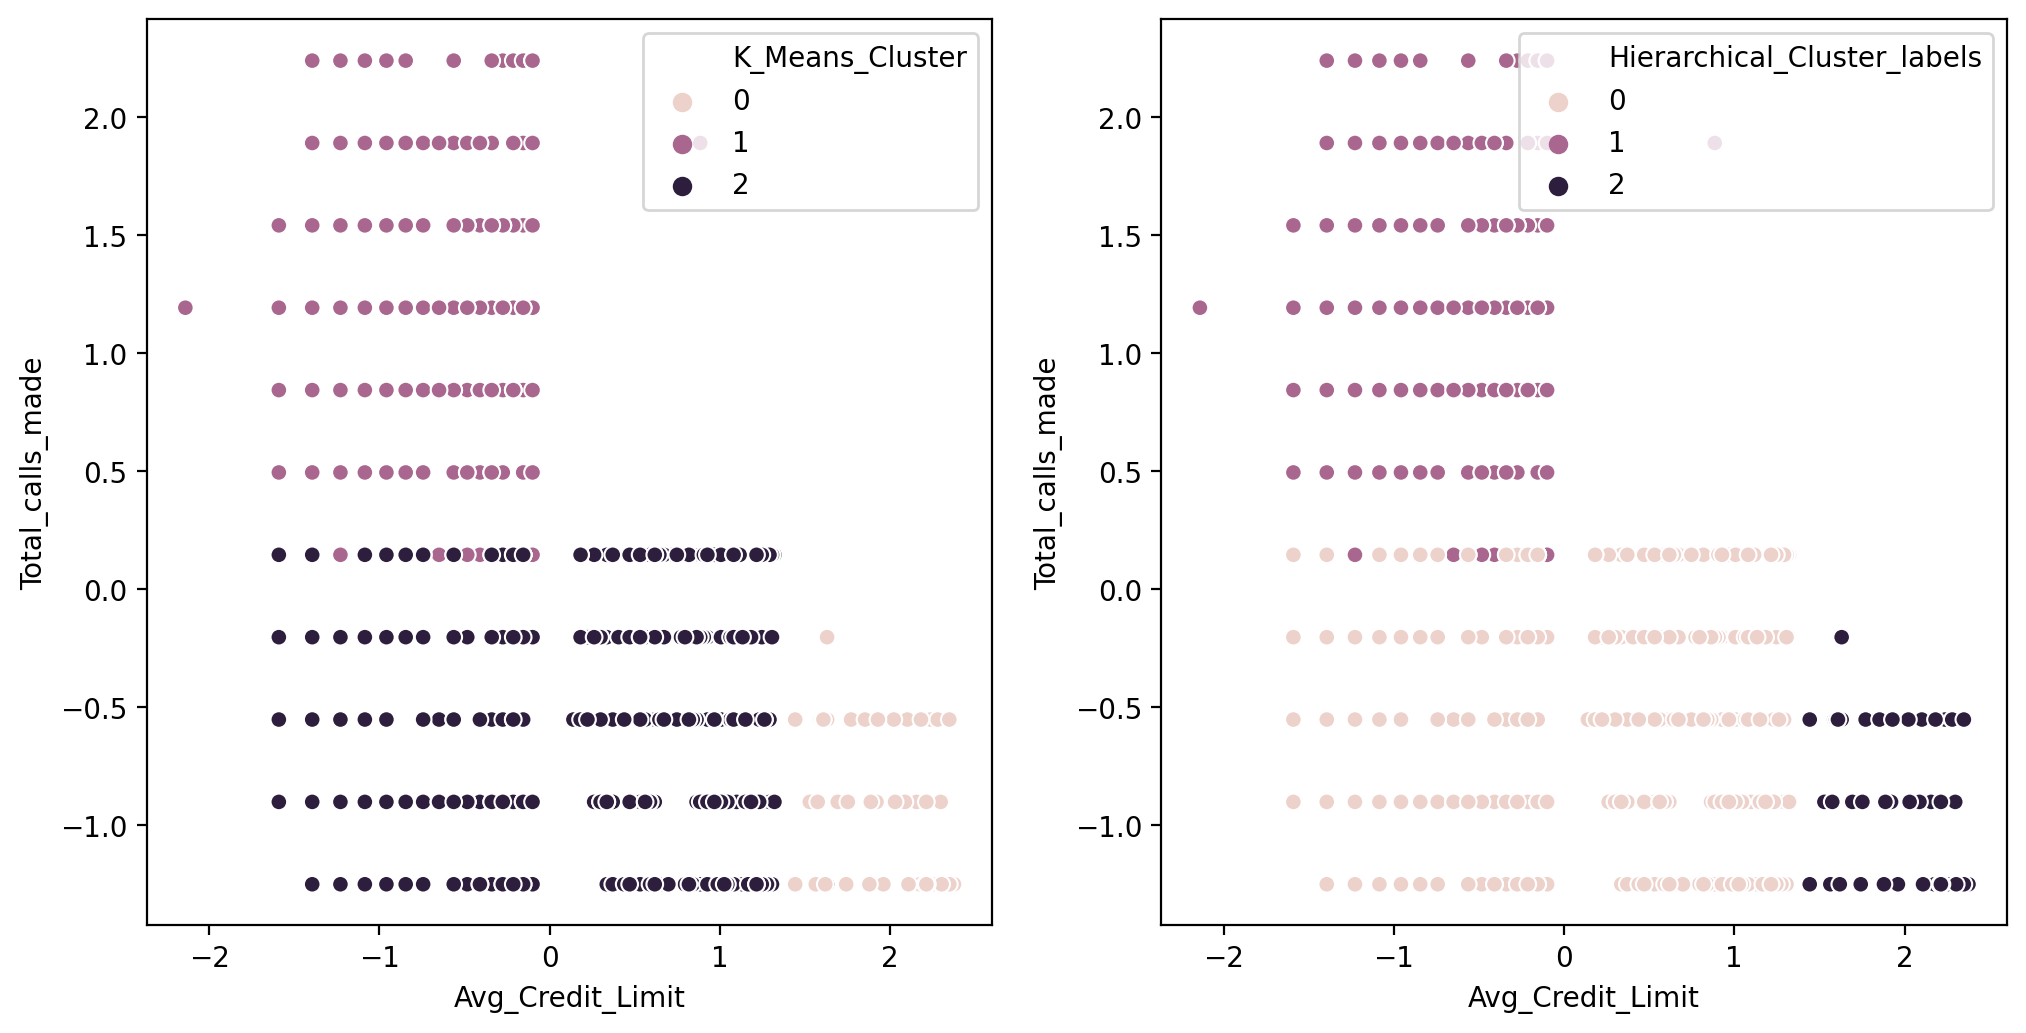

In [48]:
# scatter plot using the first two principal components to observe the cluster distribution
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_calls_made',data=df_z,hue='K_Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_calls_made',data=df_hc,hue='Hierarchical_Cluster_labels')

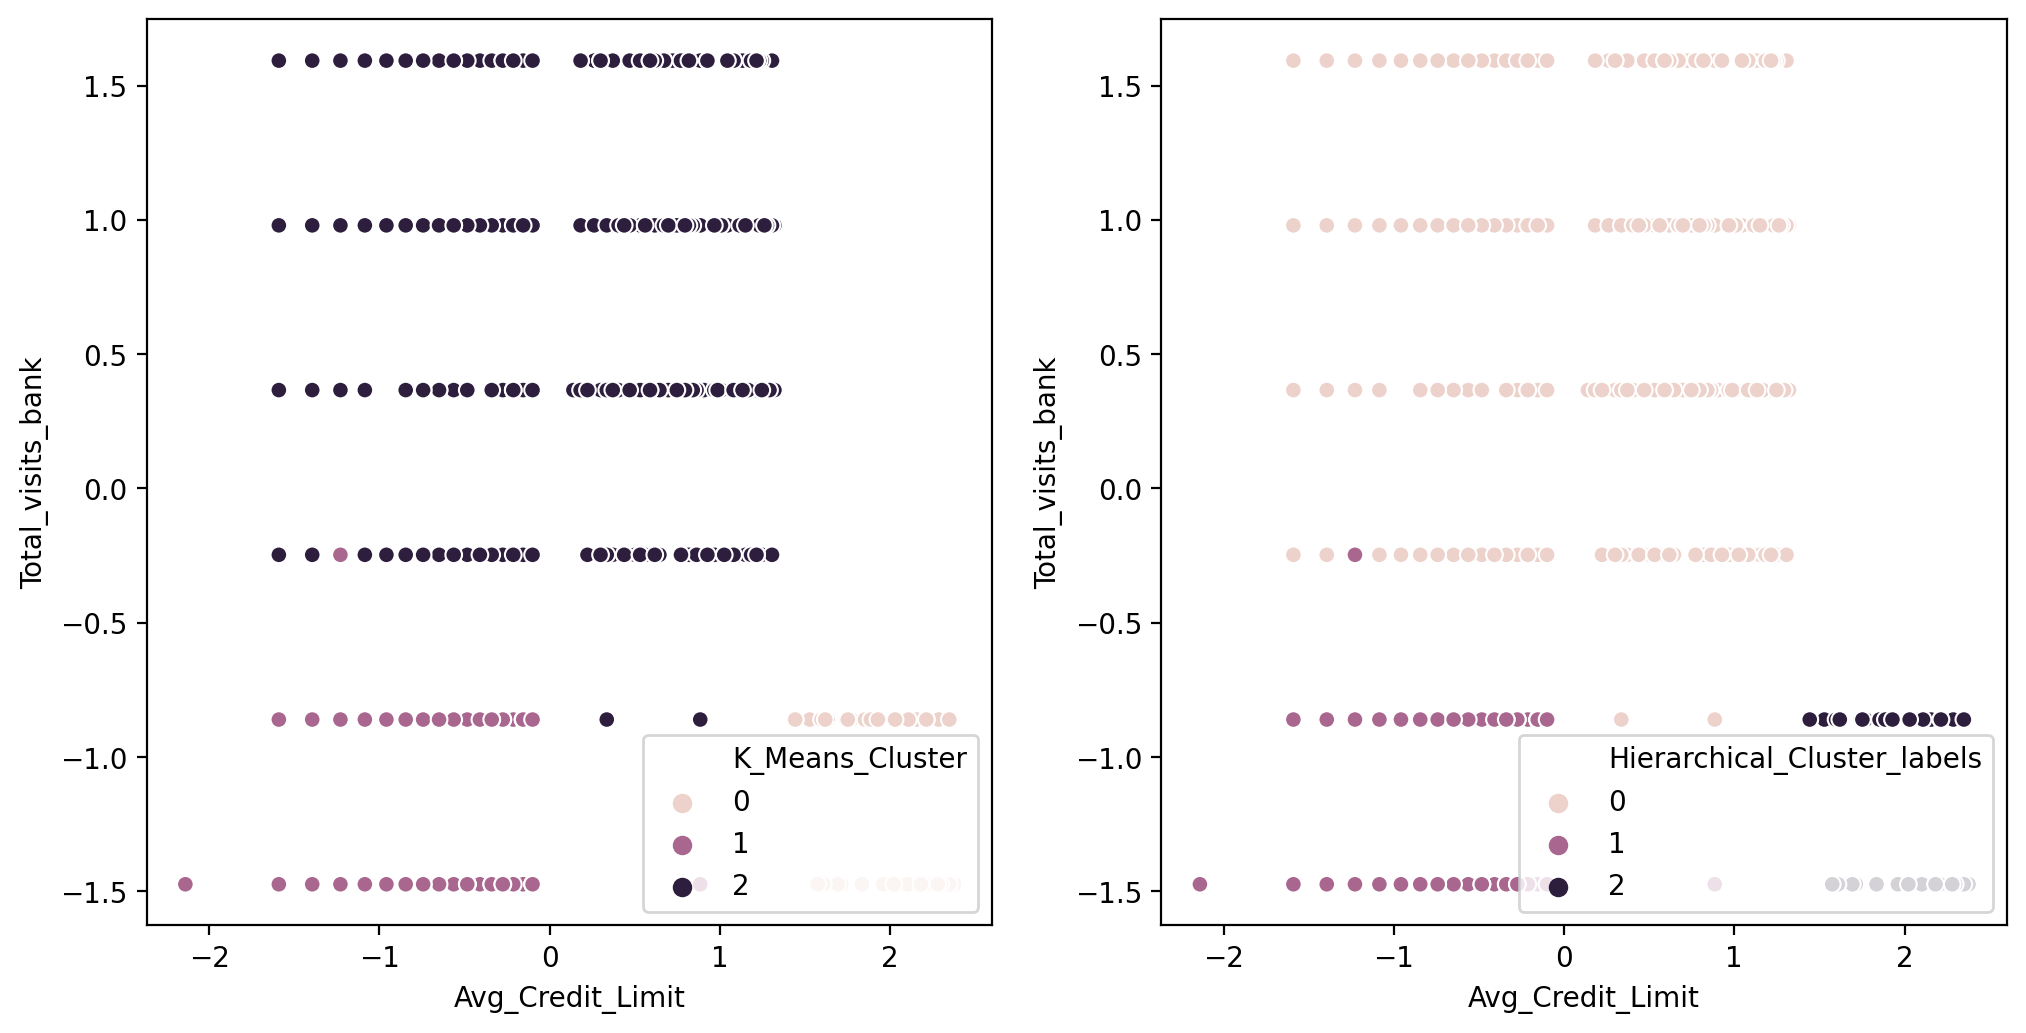

In [49]:
# scatter plot using the first two principal components to observe the cluster distribution
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Avg_Credit_Limit' , y='Total_visits_bank',data=df_z,hue='K_Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_bank',data=df_hc,hue='Hierarchical_Cluster_labels')

### 7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions

1) How many different segments of customers are there? 

Ans: Based on the analysis done using K-Means and H-Clusters, Cluster pattern comparison and other data point, the customers can be broadly segmented into 3 categories. 1. Based on Avg Credit Card Limit, 2. Based on number of credit cards 3. Based on their interaction with customer services. (3 Customer Segments)

2) How are these segments different from each other? 

Ans: These segments are different from each other based on their credit limit, number of credit cards ownned and how they interact with the banks customer services.

3) What are your recommendations to the bank on how to better market to and service these customers? 

Ans: The recommendations to the bank is to have different strategies to retain and increase customer value by target low value customers (avg credit limit and less than 3 credit card) with marketing strategies to increase their credit limits and offer incentives to acquire more credit cards. Also since these customers are primarily interacting with the bank over calls to the customer service center, an improved customer experience on the calls will help retain them and increase value 

For customers who are in the mid range value (Less than 6 credit cards and avg credit card limit less than 34000 who prefer to visit the bank and interact directly with the bank, to focus marketing strategy to up-sell more when they visit the bank and also provide better experience at the bank location 

For customers who are high value (greater than 6 credit cards and avg limit of 141,000, who prefer to interact using online method, the bank can focus on improving their experience online and upsell other services and ensure that these customers are retained and remain as customers